<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3906467413.py:16: SyntaxWarning: invalid escape sequence '\s'
  fig.suptitle('Бифуркация "вилка" для дискретной системы $x_{n+1} = λx_{n} - \sin(x_{n})$', fontsize=20)
/tmp/ipython-input-3906467413.py:22: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x_range, f(x_range, lam), 'b-', lw=2, label=f'$y = {lam}x - \sin(x)$')


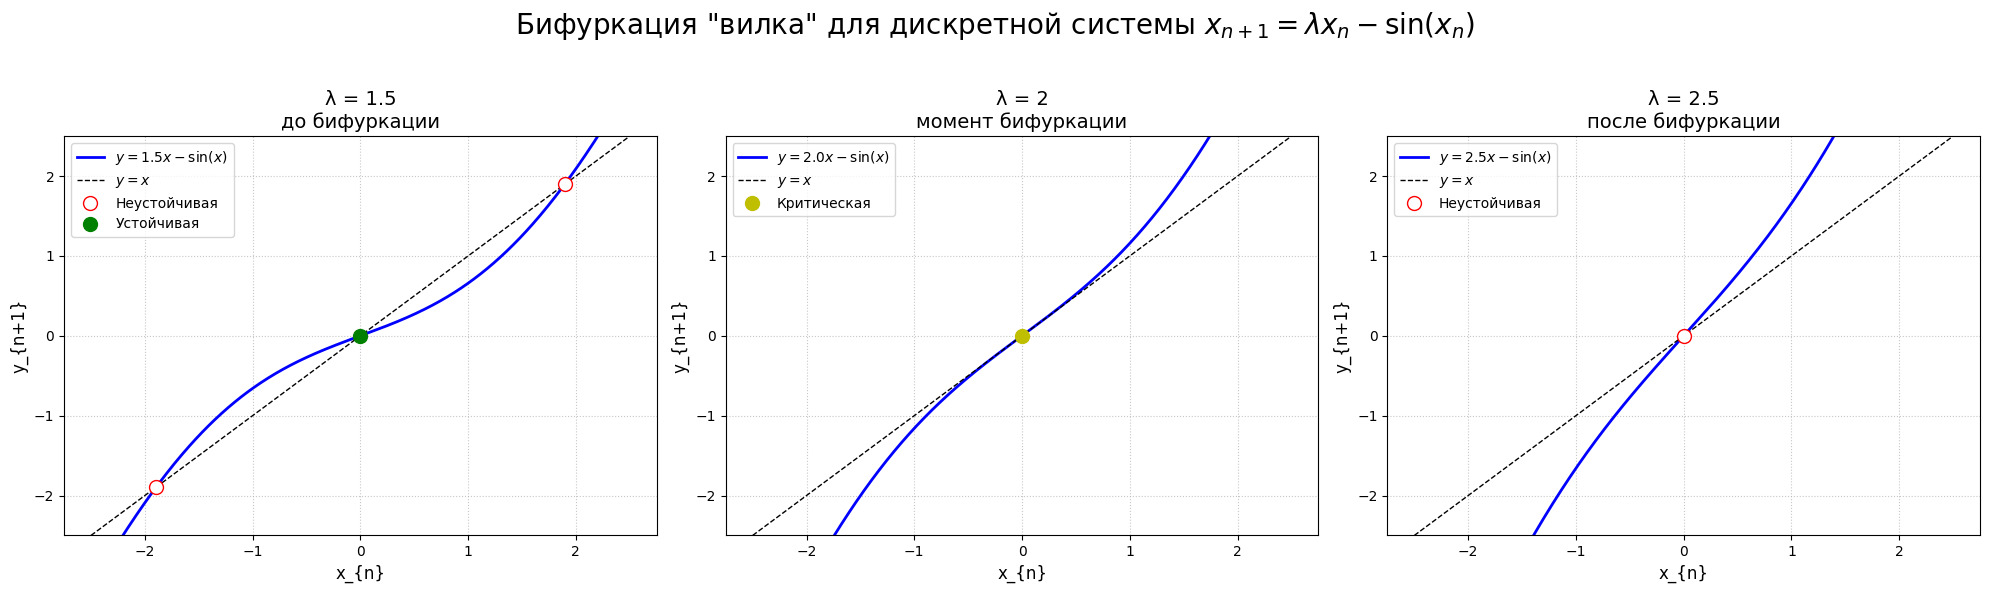

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def f(x, lam):
    return lam * x - np.sin(x)

lambdas = [1.5, 2.0, 2.5]
subtitles = [
    "до бифуркации",
    "момент бифуркации",
    "после бифуркации"
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Бифуркация "вилка" для дискретной системы $x_{n+1} = λx_{n} - \sin(x_{n})$', fontsize=20)

x_range = np.linspace(-2.5, 2.5, 500)

for i, (ax, lam, subtitle) in enumerate(zip(axes, lambdas, subtitles)):
    ax.plot(x_range, f(x_range, lam), 'b-', lw=2, label=f'$y = {lam}x - \sin(x)$')
    ax.plot(x_range, x_range, 'k--', lw=1, label='$y=x$')

    roots = fsolve(lambda x: f(x, lam) - x, [-2, 0, 2])
    roots = np.unique(np.round(roots, 5))

    for root in roots:
        slope = lam - np.cos(root)

        if np.abs(slope) < 1:
            ax.plot(root, root, 'go', markersize=10, label='Устойчивая' if 'Устойчивая' not in ax.get_legend_handles_labels()[1] else "")
        elif np.abs(slope) > 1:
            ax.plot(root, root, 'ro', markerfacecolor='white', markersize=10, label='Неустойчивая' if 'Неустойчивая' not in ax.get_legend_handles_labels()[1] else "")
        else:
             ax.plot(root, root, 'yo', markersize=10, label='Критическая' if 'Критическая' not in ax.get_legend_handles_labels()[1] else "")

    ax.set_title(f"λ = {lam:g}\n{subtitle}", fontsize=14)
    ax.set_xlabel('x_{n}', fontsize=12)
    ax.set_ylabel('y_{n+1}', fontsize=12)
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.legend()
    ax.set_ylim(-2.5, 2.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()